Link to data source: https://www.kaggle.com/datasets/shivarajmishra/heart-data

Heart Disease Data: Dataset dùng để chuẩn đoán một người có mắc bệnh tim hay không dựa vào các thông số đăc trưng như độ tuổi, giới tính, nồng độ cholesterol, ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('./data.csv')
# print(data)
data1=data[['age']]
print(data.head())
print(data1)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0      2.4      2   
1   67    0   3       115   564    0        2      160      0      1.6      2   
2   57    1   2       124   261    0        0      141      0      0.3      1   
3   64    1   4       128   263    0        0      105      1      0.2      2   
4   74    0   2       120   269    0        2      121      1      0.2      1   

   ca  thal  target  
0   3     3       2  
1   0     7       1  
2   0     7       2  
3   1     7       1  
4   1     3       1  
     age
0     70
1     67
2     57
3     64
4     74
..   ...
265   52
266   44
267   56
268   57
269   67

[270 rows x 1 columns]


In [3]:
def bootstraps(data1,n_bootstraps=600,x=1):
    new_data=data1
    size_age =n_bootstraps - data1.shape[0]

    age_n   = np.random.choice(data['age'],replace=True,size=size_age)

    for b in range(size_age):
        a = age_n[b]
        new_data_row = {'age':[a]}
        new_data_row1 = pd.DataFrame(new_data_row)
        new_data.append(new_data_row1,ignore_index=True)

        #ve do thi

    plt.title("Phân bố lấy mẫu")
    plt.xlabel("Độ tuổi")
    plt.ylabel("Số lượng")
    plt.hist(new_data, bins=10)
    #trung vi
    median_age = np.median(np.array(new_data["age"]))
    plt.axvline(median_age, color='red',label="Age Medium")
    plt.show()
        
        
    return(new_data)



C:\Users\acer\AppData\Local\Temp\ipykernel_18232\3784864611.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data.append(new_data_row1,ignore_index=True)


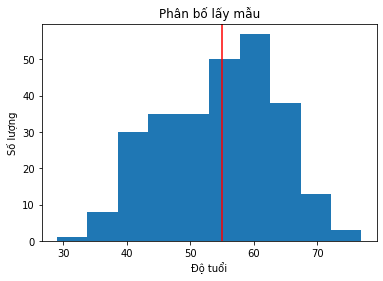

IQR:  13.0


In [4]:
data3 = bootstraps(data1,n_bootstraps=600,x=1)
def IQR_calculator(data3):
    IQR = []
    # for i in range data3:

    q3,q1 = np.percentile(data3, [75 ,25])
    IQR = np.subtract(q3,q1)
    return np.subtract(q3,q1)
result = IQR_calculator(data3)
print("IQR: ",result)


<function matplotlib.pyplot.show(close=None, block=None)>

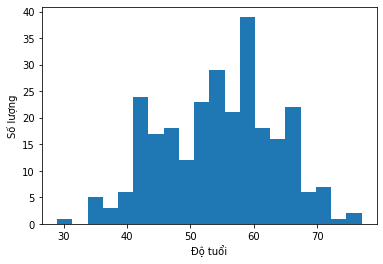

In [5]:
#Câu 2: Đặc trưng age và sex

# Histogram : Số lượng người mắc bệnh tim theo độ tuổi

data_age = data[['age']]
plt.title("")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng")
plt.hist(data_age, bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

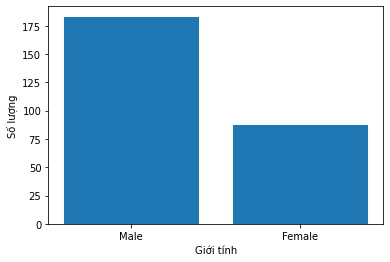

In [6]:
#Bar Chart : Số lượng người mắc bệnh tim theo giới tính nam và nữ
# Sex: sex (1=male; 0=female)

data_sex = data[['sex']]
count_male = data_sex[data_sex['sex'] == 1].count().sex
count_female = data_sex[data_sex['sex'] == 0].count().sex

# print(count_male) 

count = [count_male , count_female]
label = ["Male" , "Female"]

plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.bar(label,count)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

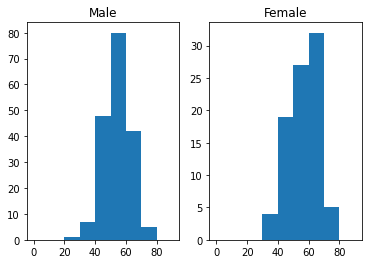

In [7]:
#Histogram Plot: Sự tương quan giữa số lượng người mắc bệnh tim theo giới tính và độ tuổi
data5 = data[['sex','age']]
Male = data5[data5['sex'] == 1]
Female = data5[data5['sex'] == 0]

bin = np.arange(0,100,10)
plt.subplot(1,2,1)
plt.title('Male')
plt.hist(Male[['age']],bins=bin)

plt.subplot(1,2,2)
plt.title('Female')
plt.hist(Female[['age']],bins=bin)

plt.show



Tổng kết: 
-Độ tuổi dễ mắc bệnh tim nhất là từ 40 tuổi
-Nam giới dễ mắc bệnh tim hơn nữ giới
-Cùng một độ tuổi thì số lượng người mắc bệnh tim ở nam cao hơn ở nữ